In [8]:
import scipy
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb

TrainSet = pd.read_csv('TrainingDataBinary.csv')

TestSet = pd.read_csv('TestingDataBinary.csv')



TrainLabels = TrainSet.iloc[:,128]

TrainSet = TrainSet.drop(TrainSet.columns[128], axis =1)

In [53]:


param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 


grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

clf.fit(TrainSet, TrainLabels)

scores = cross_val_score(clf, TrainSet, TrainLabels, cv=5)

print(scores.mean())

0.8271209341117599


In [25]:
scaler = StandardScaler()
scaler.fit(TrainSet)
TrainSet = scaler.transform(TrainSet)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(TrainSet, TrainLabels)

scores = cross_val_score(knn, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.7356214901306645


In [18]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(TrainSet, TrainLabels)
scores = cross_val_score(qda, TrainSet, TrainLabels, cv=5)
print(scores.mean())

c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Pytho

0.8404495412844037


In [40]:
lda = LinearDiscriminantAnalysis()
lda.fit(TrainSet, TrainLabels)
scores = cross_val_score(lda, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.8256182930219629


In [49]:
rf = RandomForestClassifier(max_depth=100, random_state=0)
rf.fit(TrainSet, TrainLabels)

scores = cross_val_score(rf, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.85964011676397


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60, 75, 90],
    "logistic__C": np.logspace(-1, 1, 1),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()


(5999, 128)
(5999,)


ValueError: Invalid parameter C for estimator RandomForestClassifier(max_depth=100, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [2]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(TrainSet, TrainLabels)
best_grid = grid_search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(TrainSet, TrainLabels)
best_grid = grid_search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

(5999, 128)
(5999,)
Best parameter (CV score=0.902):
{'logistic__bootstrap': True, 'logistic__max_depth': 100, 'logistic__min_samples_leaf': 2, 'logistic__min_samples_split': 4, 'logistic__n_estimators': 200, 'logistic__n_jobs': -1, 'logistic__random_state': 0, 'pca__n_components': 60}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.141815      0.695433         0.083577        0.020554   

  param_logistic__bootstrap param_logistic__max_depth  \
0                      True                       100   

  param_logistic__min_samples_leaf param_logistic__min_samples_split  \
0                                2                                 4   

  param_logistic__n_estimators param_logistic__n_jobs  ...  \
0                          200                     -1  ...   

  param_pca__n_components                                             params  \
0                      60  {'logistic__bootstrap': True, 'logistic__max_d...   

  split0_test_score  split1_test

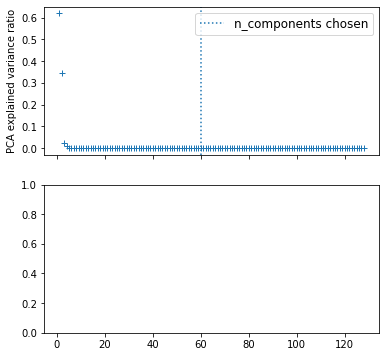

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [60, ],
    'logistic__bootstrap': [True],
    'logistic__max_depth': [100],
    'logistic__min_samples_leaf': [2 ],
    'logistic__min_samples_split': [ 4],
    'logistic__n_estimators': [200],
    'logistic__n_jobs':[-1],
    'logistic__random_state':[0]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)


In [10]:
best_grid = search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.9008122046149569


In [11]:
best_grid

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=2,
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

(5999, 128)
(5999,)
Best parameter (CV score=0.901):
{'logistic__bootstrap': True, 'logistic__max_depth': 100, 'logistic__min_samples_leaf': 2, 'logistic__min_samples_split': 4, 'logistic__n_estimators': 200, 'logistic__random_state': 0, 'pca__n_components': 60}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       10.21639      0.583091         0.065792        0.009929   

  param_logistic__bootstrap param_logistic__max_depth  \
0                      True                       100   

  param_logistic__min_samples_leaf param_logistic__min_samples_split  \
0                                2                                 4   

  param_logistic__n_estimators param_logistic__random_state  \
0                          200                            0   

  param_pca__n_components                                             params  \
0                      60  {'logistic__bootstrap': True, 'logistic__max_d...   

   split0_test_score  split1_test_score  split2_test_s

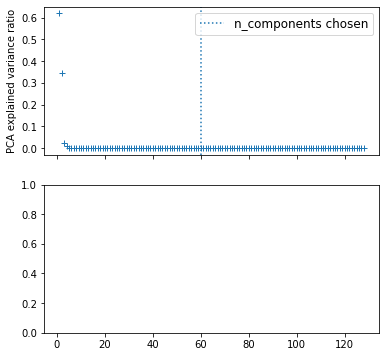

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [60],
    'logistic__bootstrap': [True],
    'logistic__max_depth': [100],
    'logistic__min_samples_leaf': [2],
    'logistic__min_samples_split': [4, ],
    'logistic__n_estimators': [200],
    'logistic__random_state':[0]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

print(search.best_score_)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [45, 60, ],
    'logistic__bootstrap': [True],
    'logistic__max_depth': [80, 100],
    'logistic__min_samples_leaf': [1, 2, 3 ],
    'logistic__min_samples_split': [2, 4, 8  ],
    'logistic__n_estimators': [100, 200, 1000],
    'logistic__n_jobs':[-1],
    'logistic__random_state':[0,1,2,3,4,5]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)
